# ANKIT




# Objective :- TITANIC SURVIVAL PREDICTION



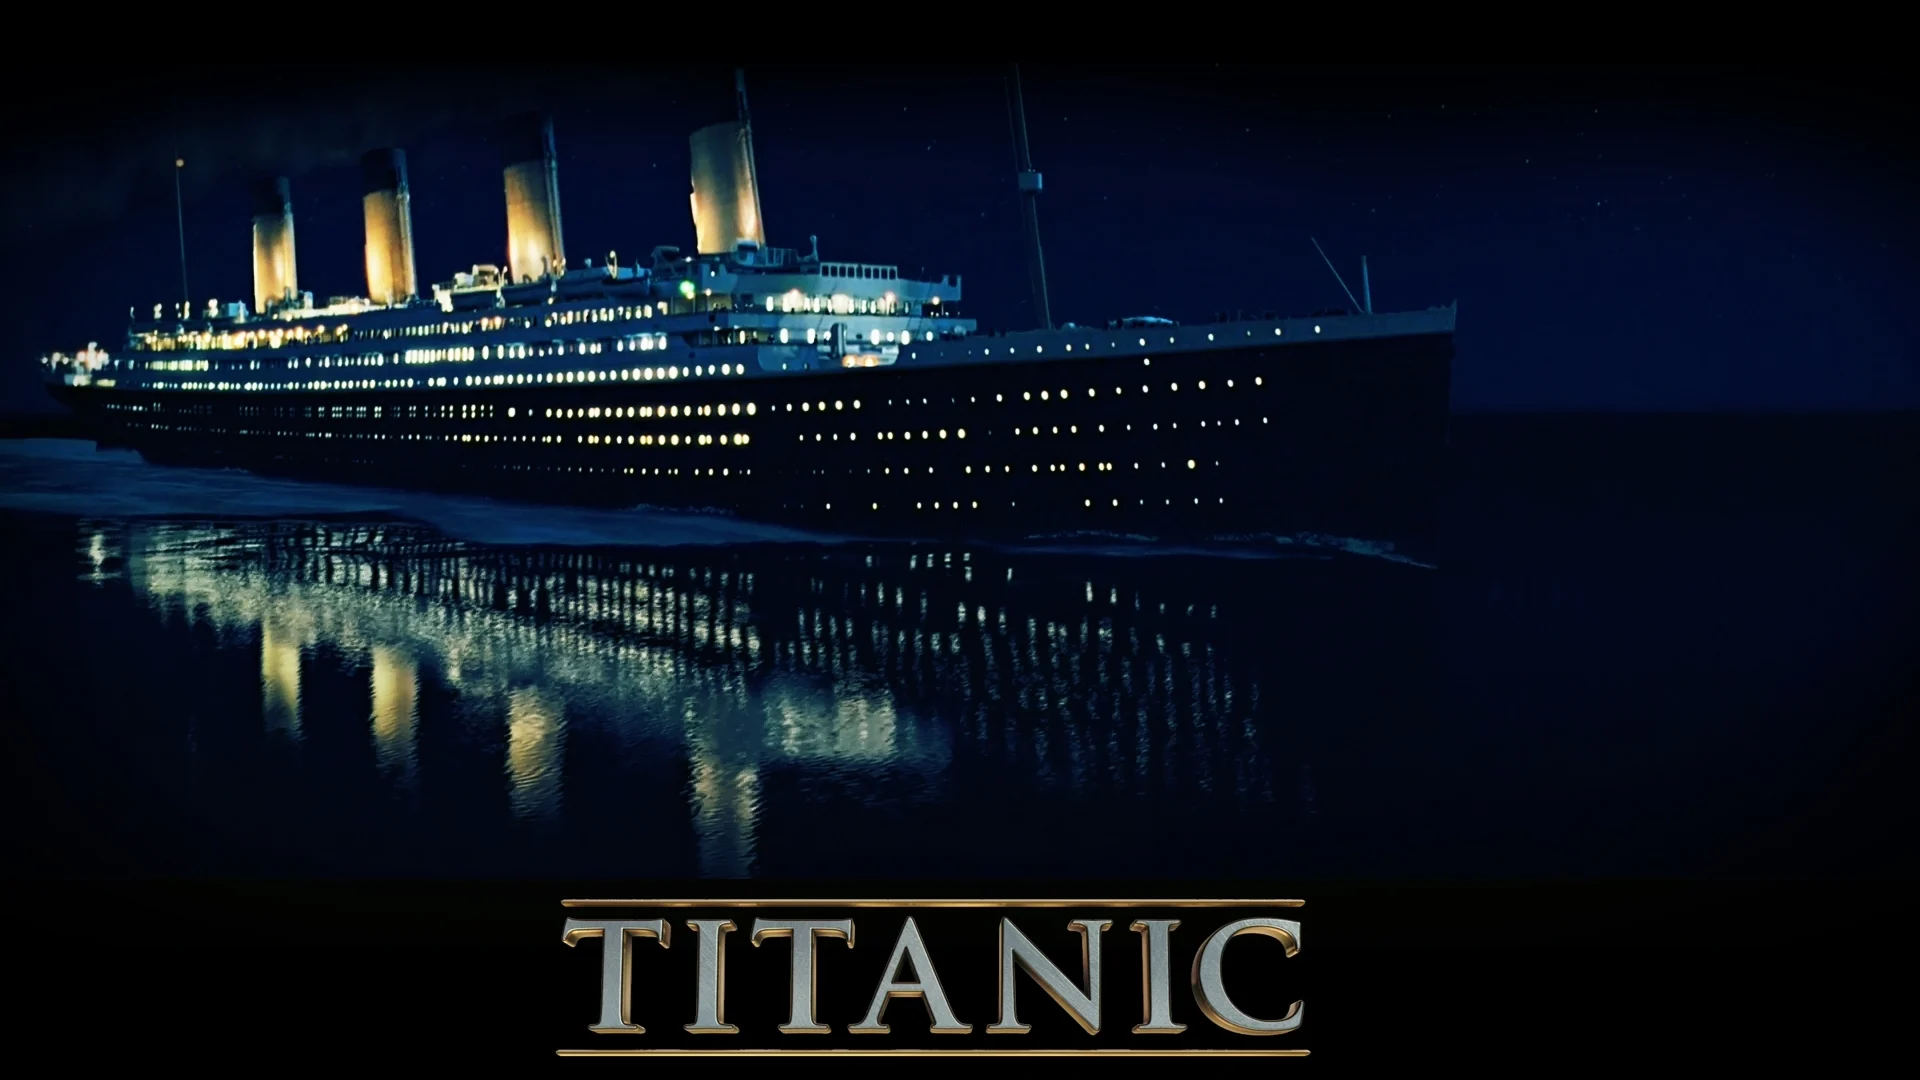

# 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## Load the Titanic dataset

In [2]:
titanic_data = pd.read_csv(r"D:\Bharat Intern\Data Science\Data science task\Titanic Classification\tested.csv")
print("data successfully load")

data successfully load


In [3]:
#Reading first 10 rows
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
#Reading last 10 raw

titanic_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
#It is showling no. of raw and columns of the dataset
titanic_data.shape

(418, 12)

In [6]:
#It is showing the size of the dataset
titanic_data.size

5016

In [7]:
#Checking for columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Preprocessing and Data Cleaning

In [8]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#checking for duplicated values

titanic_data.duplicated().sum()

0

In [10]:
# checking for null values 
nv = titanic_data.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin    327
Age       86
Fare       1
dtype: int64

In [11]:
# Cheecking what percentage column contain missing values

titanic_data.isnull().sum().sort_values(ascending=False)*100/len(titanic_data)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [12]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column

titanic_data.drop(columns ='Cabin' ,axis=1 , inplace = True)
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [13]:
# Filling Null Values in Age column with mean values of age column
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

# filling null values in Embarked Column with mode values of embarked column
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [14]:
#Checking the null values
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [15]:
# Finding no. of unique values in each column of dataset
titanic_data[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
                              'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            8
Age             80
Fare           169
Ticket         363
PassengerId    418
Name           418
dtype: int64

In [16]:
titanic_data['Survived'].unique()

array([0, 1], dtype=int64)

In [17]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
titanic_data['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [19]:
titanic_data['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [20]:
titanic_data['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [21]:
titanic_data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [22]:
# Print the first few rows of the DataFrame to check column names and data
print(titanic_data.head())

# Check the exact column names in the DataFrame
print(titanic_data.columns)

# Drop the columns if they exist in the DataFrame
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
columns_existing = [col for col in columns_to_drop if col in titanic_data.columns]

if columns_existing:
    titanic_data.drop(columns=columns_existing, axis=1, inplace=True)
    print("Columns dropped:", columns_existing)
else:
    print("Columns not found:", columns_existing)


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S  
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],


In [23]:
# Showing inforamation about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [24]:
#Showing info about categorical columns
titanic_data.describe(include='O')

,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


## Data Visualization




### 01.Sex Columns

In [25]:
d1=titanic_data['Sex'].value_counts()
d1

male      266
female    152
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

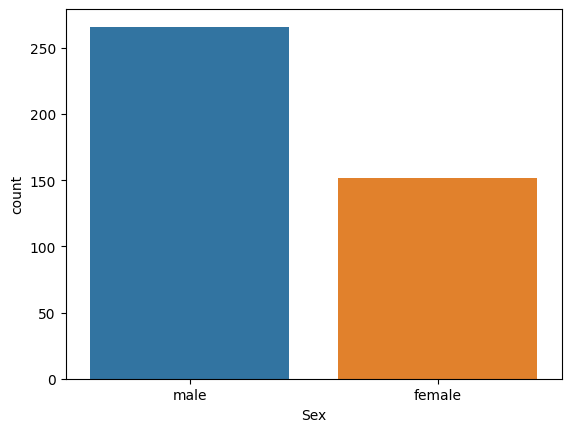

In [26]:
#plotting Count plot for sex columns
sns.countplot(x=titanic_data['Sex'])
plt.show

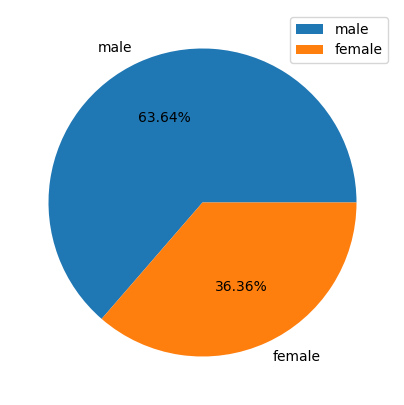

In [27]:
#Plotting percantage Distribution of sex columns
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

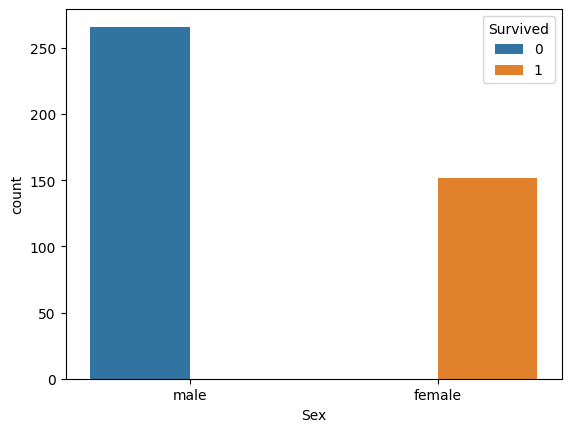

In [28]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])# In Sex (0 represents female and 1 represents male)
plt.show()

The data presented in the plot indicates a noticeable disparity in survival rates between genders. Specifically, a higher percentage of females have survived compared to males, while conversely, a larger proportion of males have unfortunately perished relative to females.

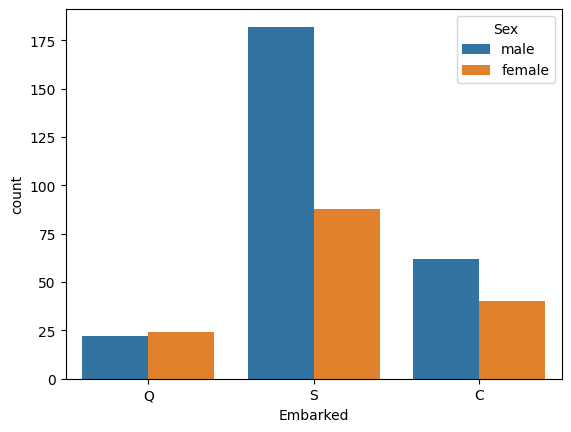

In [29]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=titanic_data['Embarked'],hue=titanic_data['Sex'])
plt.show()


### 02.Pclass Column

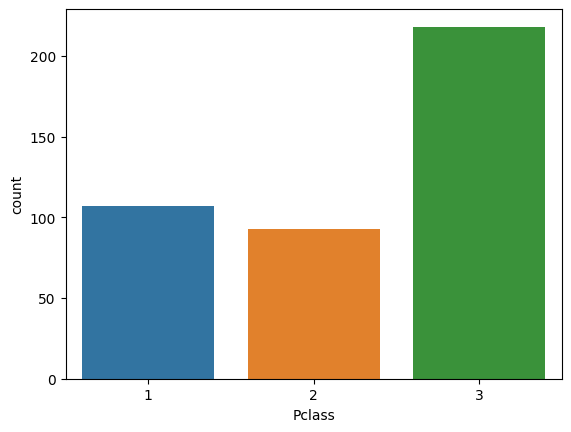

In [30]:
sns.countplot(x=titanic_data['Pclass'])
plt.show()

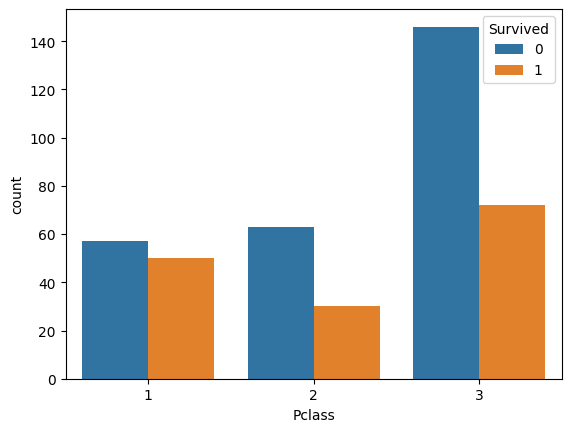

In [31]:
#Showing Distribution of Pclass Survived wise
sns.countplot(x=titanic_data['Pclass'],hue=titanic_data['Survived'])
plt.show()


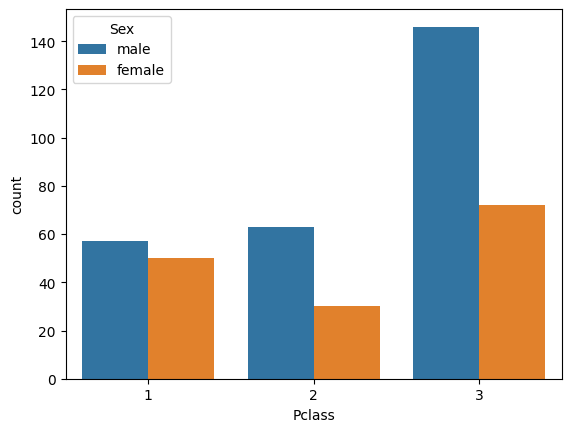

In [32]:
#Showing Distribution of Pclass Sex wise
sns.countplot(x=titanic_data['Pclass'],hue=titanic_data['Sex'])
plt.show()

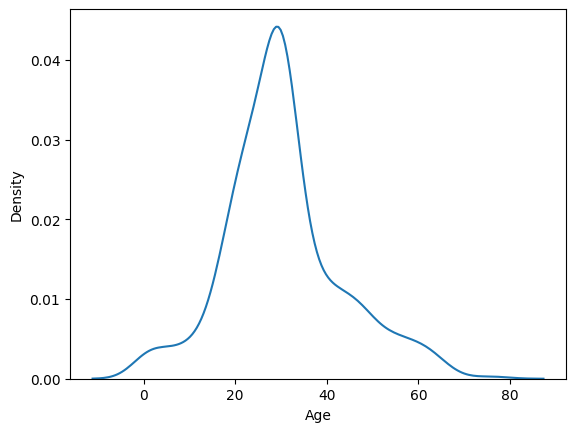

In [33]:
#Age Distribution 
sns.kdeplot(x=titanic_data['Age'])
plt.show()

From this plot it came to know that most of the people lie between 20-40 age group.

### 03.Survived Column

In [34]:
print(titanic_data['Survived'].value_counts())

0    266
1    152
Name: Survived, dtype: int64


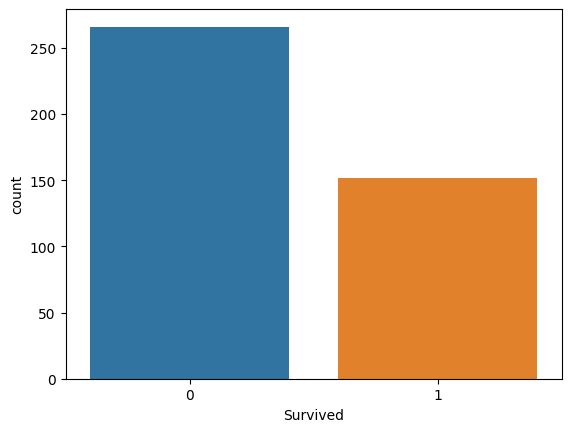

In [35]:
#Plotting countplot for survived column
sns.countplot(x=titanic_data['Survived'])
plt.show()

This plot Clearly shows most people are died.write a differend way

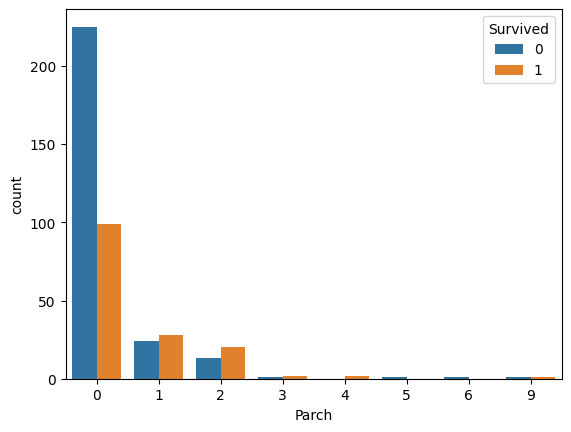

In [36]:
#Showing distribution of parch Survived Wise
sns.countplot(x=titanic_data['Parch'],hue=titanic_data['Survived'])
plt.show()

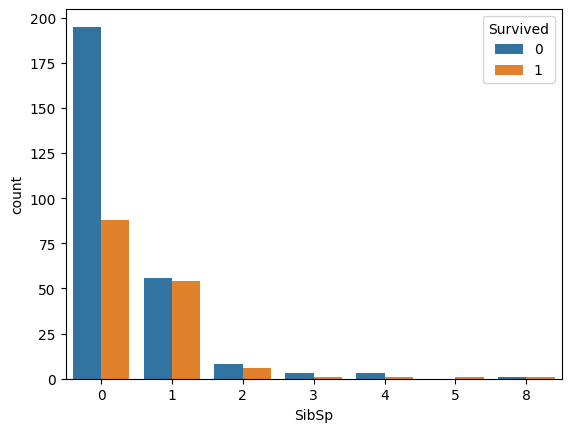

In [37]:
#Showing distribution of SibSp Survived Wise
sns.countplot(x=titanic_data['SibSp'],hue=titanic_data['Survived'])
plt.show()

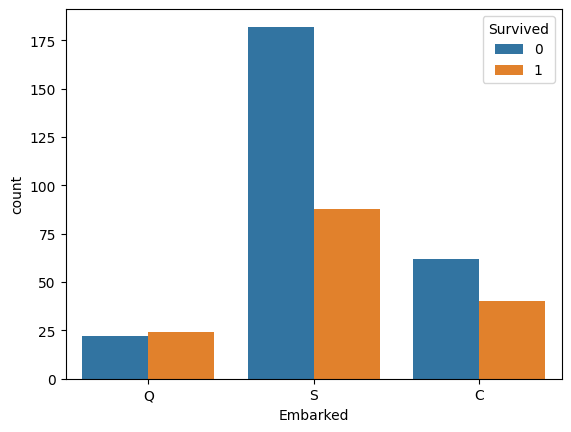

In [38]:
#Showing distribution of Embarked Survived Wise
sns.countplot(x=titanic_data['Embarked'],hue=titanic_data['Survived'])
plt.show()

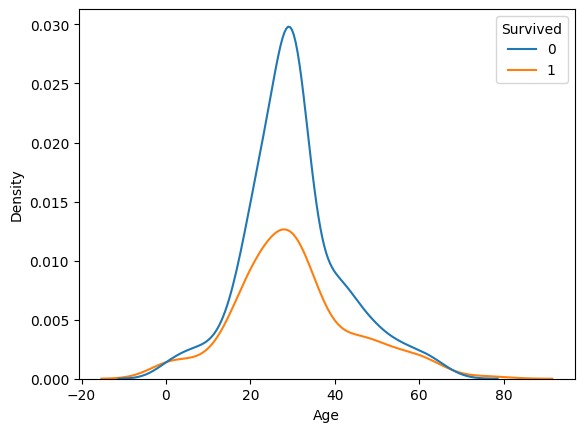

In [39]:
# Showing Distribution of Age Survived Wise 
sns.kdeplot(x=titanic_data['Age'],hue=titanic_data['Survived'])
plt.show()

This Plot showing most people of age group of 20-40 are died

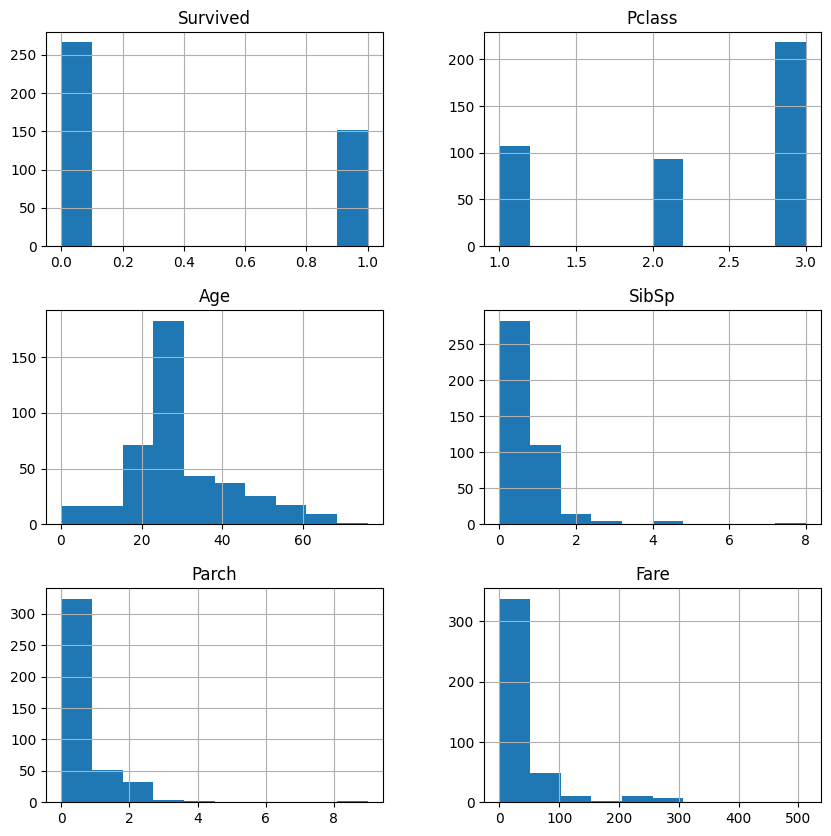

In [40]:
# Plotting Histplot for Dataset
titanic_data.hist(figsize=(10,10))
plt.show()

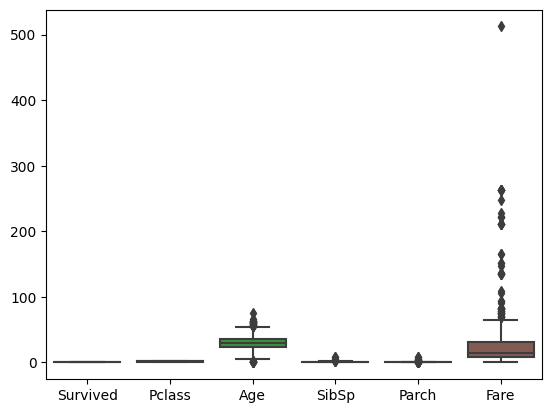

In [41]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic_data)
plt.show()

In [42]:
#Showing correlation
titanic_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191514
Pclass,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.577147
Age,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.329071
SibSp,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171539
Parch,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230046
Fare,0.191514,-0.577147,0.329071,0.171539,0.230046,1.000000


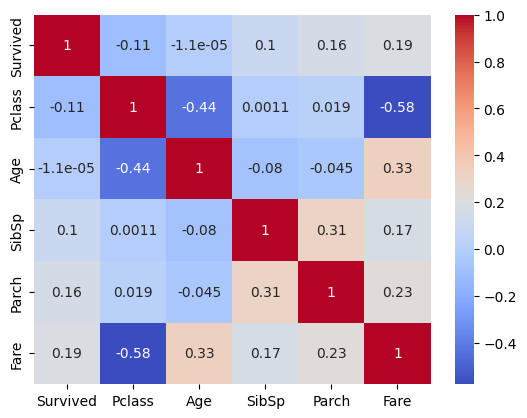

In [43]:
#Showing correlation plot
sns.heatmap(titanic_data.corr(),annot=True,cmap='coolwarm')
plt.show()

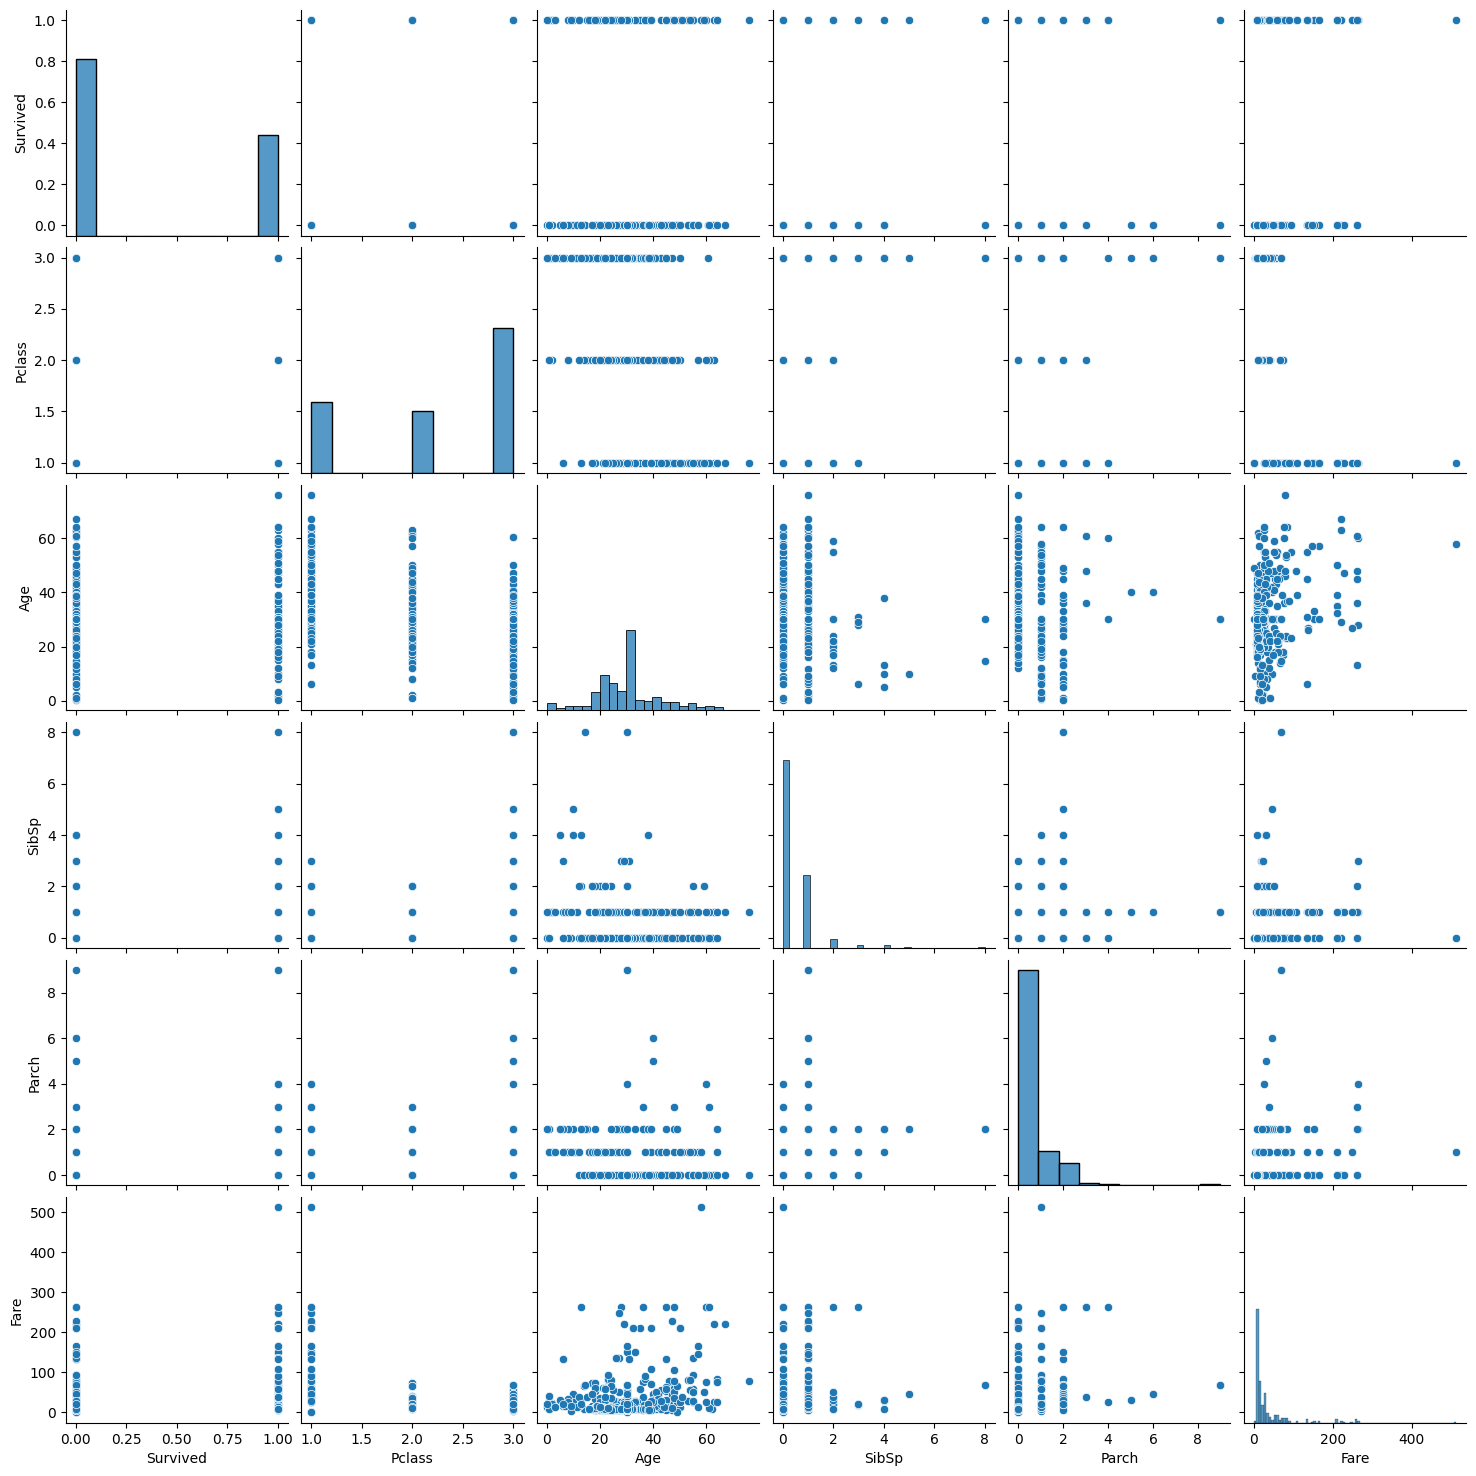

In [44]:
#plotting pairplot
sns.pairplot(titanic_data)
plt.show()

## Checking the target variable


In [45]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

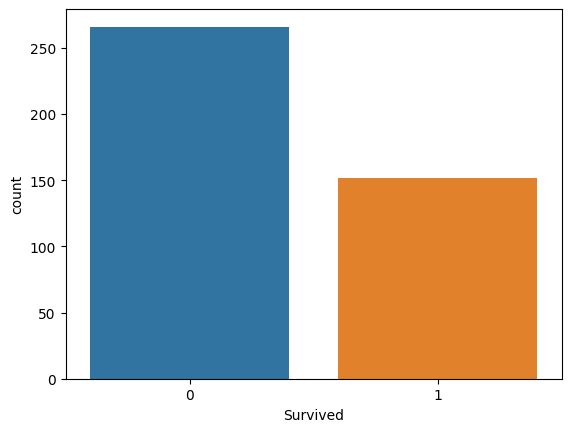

In [46]:
sns.countplot(x=titanic_data['Survived'])
plt.show()

## Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder
le= LabelEncoder()

#Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic_data[column]=le.fit_transform(titanic_data[column])
titanic_data.head()    

# Embarked Column         

# 0 represents C
# 1 represents Q
# 2 represents S

# Sex Column

# 0 represents female
# 1 represents Male

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


## Data Modelling

In [48]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## Selecting the independent and dependent Features 

In [49]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic_data[cols]
y = titanic_data['Survived']
print(x.shape)
print(y.shape)
print(type(x))  #DataFrame
print(type(y))  #Series

(418, 7)
(418,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [50]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [51]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

## Train Test split

In [52]:
print(418*0.10)

41.800000000000004


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print("Shape of x_train :",x_train.shape)
print("Shape of x_test :",x_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of x_train : (376, 7)
Shape of x_test : (42, 7)
Shape of y_train : (376,)
Shape of y_test : (42,)


##  Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy) 

In [54]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

### 01.Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Create an imputer with the desired strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit and transform your input data
x_train = imputer.fit_transform(x_train)

# Build the logistic regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Fit the model
lr.fit(x_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [56]:
# Computing the logistic Regression Model
mscore(lr)

Training Score 1.0
Testing Score 1.0


In [57]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0]


In [58]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[31  0]
 [ 0 11]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        11

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Accuracy Score 1.0


### 02.K-Nearest Neighbor (KNN) Classifier Model

In [59]:
# Building the knnClassifier Model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [60]:
# Computing Training and Testing score
mscore(knn)

Training Score 0.7313829787234043
Testing Score 0.7380952380952381


In [61]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 0]


In [62]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score :',acc_knn)

Confusion Matrix
 [[27  4]
 [ 7  4]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.50      0.36      0.42        11

    accuracy                           0.74        42
   macro avg       0.65      0.62      0.63        42
weighted avg       0.72      0.74      0.72        42

Accuracy Score : 0.7380952380952381


### 03.Support Vector Classifier(SVC)

In [63]:
svc = SVC(C=1.0)
svc.fit(x_train,y_train)

SVC()

In [64]:
#Computing Training and Testing score
mscore(svc)

Training Score 0.6409574468085106
Testing Score 0.7380952380952381


In [65]:
#Generating Prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [66]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score :',acc_svc)

Confusion Matrix
 [[31  0]
 [11  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        31
           1       0.00      0.00      0.00        11

    accuracy                           0.74        42
   macro avg       0.37      0.50      0.42        42
weighted avg       0.54      0.74      0.63        42

Accuracy Score : 0.7380952380952381


### 04. Random Forest Classifier 

In [67]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [68]:
# Computing Training and Testing score
mscore(rfc)

Training Score 1.0
Testing Score 1.0


In [69]:
# Generating Prediction 
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0]


In [70]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score :',acc_rfc)

Confusion Matrix
 [[31  0]
 [ 0 11]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        11

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Accuracy Score : 1.0


### 05.DecisionTree Classifier

In [71]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [72]:
# Computing Training and Testing score
mscore(dt)

Training Score 1.0
Testing Score 1.0


In [73]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 0]


In [74]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score :',acc_dt)

Confusion Matrix
 [[31  0]
 [ 0 11]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        11

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Accuracy Score : 1.0


### 6. Adaboost Classifier

In [75]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [76]:
# Computing the Training and Testing Score
mscore(ada_boost)

Training Score 1.0
Testing Score 1.0


In [77]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(x_test)

In [78]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score :',acc_adab)

Confusion Matrix
 [[31  0]
 [ 0 11]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        11

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Accuracy Score : 1.0


In [79]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,1.000000
3,Random Forest Classifier,1.000000
4,Decision Tree Classifier,1.000000
5,Ada Boost Classifier,1.000000
1,knn,0.738095
2,SVC,0.738095


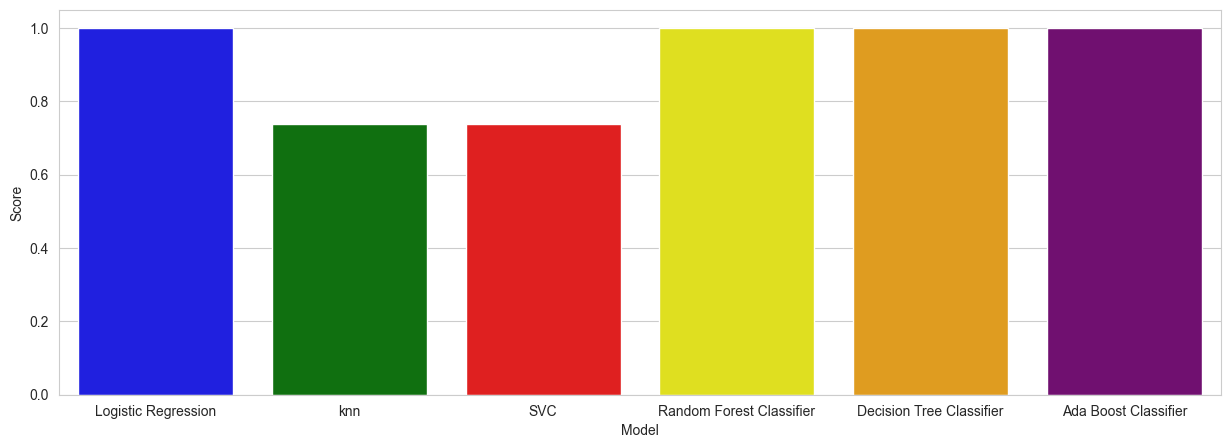

In [80]:
colors = ["blue", "green", "red", "yellow","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()